In [64]:
import pandas as pd
from matplotlib import pyplot as plt


df = pd.read_csv('./law_data.txt', sep=' ')

In [67]:
df.sum()

time        34125.780000
aps_en          0.000000
aps           488.101958
bps             0.000000
velocity    28766.919995
swa          5115.816579
dtype: float64

In [68]:
df.drop(columns=['aps_en', 'bps'])

,time,aps,velocity,swa
0,0.00,0.0,0.002707,0.000000
1,0.01,0.0,0.002707,0.000000
2,0.02,0.0,0.002707,0.000000
3,0.03,0.0,0.002707,-0.020944
4,0.04,0.0,0.002707,-0.019199
...,...,...,...,...
2608,26.08,0.0,3.104247,1.481785
2609,26.09,0.0,3.082305,1.483530
2610,26.10,0.0,3.060890,1.483530
2611,26.11,0.0,3.037864,1.487020


In [69]:
df = df.values

In [78]:
new_df = pd.DataFrame()
new_df['a'] = []
new_df['aps'] = []
new_df['velo'] = []
for i in range(2612):
    new_df.loc[i] = [(df[i+1][4] - df[i][4])/0.01, df[i][2], df[i][4]]
    


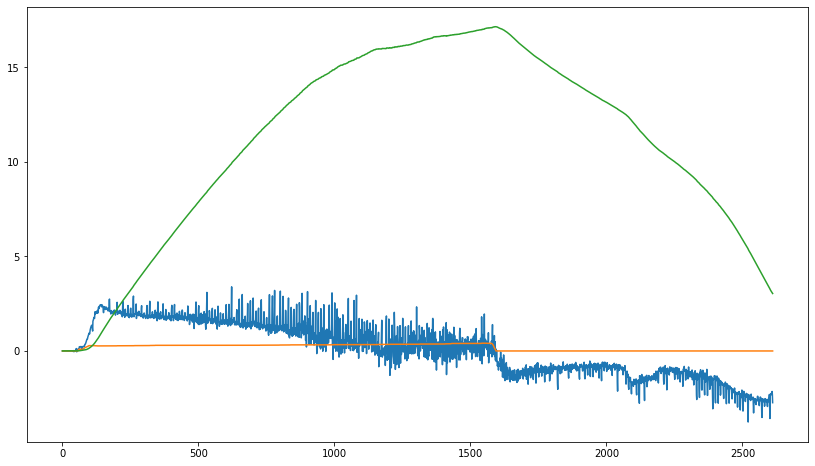

In [79]:
plt.figure(figsize=(14, 8))
plt.plot(new_df)

In [85]:
# new_df = new_df.values
new_df

array([[ 0.0000000e+00,  0.0000000e+00,  2.7069366e-03],
       [ 0.0000000e+00,  0.0000000e+00,  2.7069366e-03],
       [ 0.0000000e+00,  0.0000000e+00,  2.7069366e-03],
       ...,
       [-2.1414800e+00,  0.0000000e+00,  3.0823050e+00],
       [-2.3026000e+00,  0.0000000e+00,  3.0608902e+00],
       [-2.7352600e+00,  0.0000000e+00,  3.0378642e+00]])

In [98]:
import random

dt = 0.01
Qc = 150
Q = 0.01**2 / 2
R = 1

x0 = 0
P0 = 1

xbar = x0 + P0**0.5 + random.randrange(0, 1)
Pbar = P0
Qf = Q

X = []
XHAT = []
PHAT = []
KK = []
Z = []
ZHAT = []
SBAR = []
TIME = []


A = 1.63*1.91   # 차량 단면적
N = 2           # 속도 비례계수
F = -0.35*0.5*1.293*A*N
H = 1
b1 = 1
b2 = 1
# 측정 모델

for i in range(2612):
    # z = H * x0 + R**0.5*random.randrange(0, 1)4
    z = new_df[i][0]
    zhat = H*xbar
    S = H * Pbar * H + R
    Phat = Pbar - Pbar*H*(1/S)*H*Pbar
    K = Pbar*H*(1/S)
    xhat = xbar + K * (z-zhat)

    xbar = F*xhat + b1 * new_df[i][1] - b2 * new_df[i][2]
    Pbar = F*Phat*F + Qf

    x = F*x0 + Q**0.5 * random.randrange(0, 1)

    X.append(x0)
    XHAT.append(xhat)
    PHAT.append(Phat)
    Z.append(z)
    ZHAT.append(zhat)
    SBAR.append(S)
    TIME.append(i)
    KK.append(K)

    x0 = x





In [99]:
XHAT

[0.5,
 -0.35490054263174536,
 0.2500496211204274,
 -0.1786617811237359,
 0.1253777740478183,
 -0.0903258156255603,
 0.06273541012152044,
 -0.04588572288543267,
 0.031201735233162373,
 -0.023507887346737494,
 0.015320447746016954,
 -0.01223684597470184,
 0.007321206339733245,
 -0.006559621490081566,
 0.0032919480219237205,
 -0.0036999596268957385,
 0.0012623745220847206,
 -0.0022595203199480243,
 0.00024005814908408454,
 -0.0015339564276088818,
 -0.00027489304609101264,
 -0.0011684824468578701,
 -0.0005342792554034001,
 -0.0009843894403664655,
 -0.0006649347594798747,
 -0.0008916598966047249,
 -0.0007307472826719957,
 -0.000844951070052819,
 -0.0007638977285914328,
 -0.0008214233528861434,
 -0.0007805959497271549,
 -0.0008095721993484982,
 -0.0007890070157465976,
 -0.0008036026512124473,
 -0.0007932437563562391,
 -0.0008005957283139358,
 -0.0007953778462508086,
 -0.005634892199724328,
 -0.0018041218064597624,
 0.001971379458573445,
 -0.01896157850493816,
 0.00369961871791848,
 0.0062971